# Analysis_1
- find the pokemon distribution of type
- find the most powerful pokemons of each type 

In [21]:
import pandas as pd
from pandas import Series, DataFrame

# 1.Find the pokemon distrubution of type

In [22]:
# read the data and show
pokemon_data = pd.read_csv('../data/pokemonGO.csv')
pokemon_data.head()

,Pokemon No.,Name,Type 1,Type 2,Max CP,Max HP,Image URL
0,1,Bulbasaur,Grass,Poison,1079,83,http://cdn.bulbagarden.net/upload/thumb/2/21/0...
1,2,Ivysaur,Grass,Poison,1643,107,http://cdn.bulbagarden.net/upload/thumb/7/73/0...
2,3,Venusaur,Grass,Poison,2598,138,http://cdn.bulbagarden.net/upload/thumb/a/ae/0...
3,4,Charmander,Fire,NaN,962,73,http://cdn.bulbagarden.net/upload/thumb/7/73/0...
4,5,Charmeleon,Fire,NaN,1568,103,http://cdn.bulbagarden.net/upload/thumb/4/4a/0...


In [23]:
# delete the 'legendary'pokemons which have not been released 
print('The shape before dropping', pokemon_data.shape)
pokemon_data = pokemon_data.drop([143,144,145,149,150],axis = 0)
print('The shape before dropping',pokemon_data.shape)

The shape before dropping (151, 7)
The shape before dropping (146, 7)


In [24]:
# The formula I use to calculate the total values between HP and CP
pokemon_data["Total_values"] = pokemon_data["Max CP"] + pokemon_data["Max HP"]*0.8
pokemon_data.head()

,Pokemon No.,Name,Type 1,Type 2,Max CP,Max HP,Image URL,Total_values
0,1,Bulbasaur,Grass,Poison,1079,83,http://cdn.bulbagarden.net/upload/thumb/2/21/0...,1145.4
1,2,Ivysaur,Grass,Poison,1643,107,http://cdn.bulbagarden.net/upload/thumb/7/73/0...,1728.6
2,3,Venusaur,Grass,Poison,2598,138,http://cdn.bulbagarden.net/upload/thumb/a/ae/0...,2708.4
3,4,Charmander,Fire,NaN,962,73,http://cdn.bulbagarden.net/upload/thumb/7/73/0...,1020.4
4,5,Charmeleon,Fire,NaN,1568,103,http://cdn.bulbagarden.net/upload/thumb/4/4a/0...,1650.4


In [25]:
%matplotlib inline

In [26]:
import matplotlib.pyplot as plt

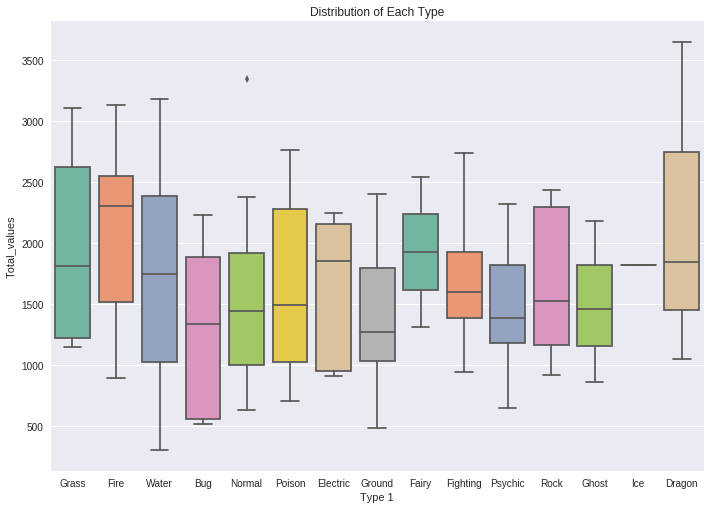

In [27]:
import seaborn as sns
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="Type 1", y="Total_values",data=pokemon_data,ax=ax,palette="Set2")
sns.plt.title('Distribution of Each Type')

In [29]:
fig.savefig('ana_1_type_distribution.png')

In [30]:
# See thw average value of each type of pokemon
df_mean = pokemon_data.loc[:,['Pokemon No.','Name','Type 1','Total_values']].groupby('Type 1').mean().sort('Total_values')
df_mean.head()

/home/pandakillalot/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Pokemon No.,Total_values
Type 1,,
Bug,42.916667,1298.600000
Ground,73.500000,1382.025000
Psychic,84.500000,1466.400000
Ghost,93.000000,1497.400000
Normal,71.727273,1522.281818


In [31]:
# counting numbers of each type
df2 = pokemon_data.loc[:,['Pokemon No.','Name','Type 1','Total_values']].groupby('Type 1').count()
df_mean['number'] = df2['Name']
df_type = df_mean.loc[:,['number','Total_values']]

In [32]:
df_type.head()

,number,Total_values
Type 1,,
Bug,12,1298.600000
Ground,8,1382.025000
Psychic,6,1466.400000
Ghost,3,1497.400000
Normal,22,1522.281818


In [33]:
df_type .to_csv('ana_1_type_distrubution.csv', encoding='utf-8')

# 2.Find the most powerful pokemons of each type

In [34]:
df3 = pokemon_data.loc[:,['Pokemon No.','Name','Type 1','Total_values']]

In [35]:
df_poke = df3.sort('Total_values', ascending=False).groupby('Type 1', as_index=False).first()
df_poke_best = df_poke.sort('Total_values', ascending=False)

/home/pandakillalot/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
/home/pandakillalot/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [36]:
df_poke_best.head()

,Type 1,Pokemon No.,Name,Total_values
1,Dragon,149,Dragonite,3649.8
10,Normal,143,Snorlax,3347.0
14,Water,131,Lapras,3176.4
5,Fire,59,Arcanine,3128.2
7,Grass,103,Exeggutor,3105.6


In [37]:
df_poke_best.to_csv('ana_1_poke_best.csv', encoding='utf-8')

In [38]:
df_poke_best = pd.read_csv('ana_1_poke_best.csv')

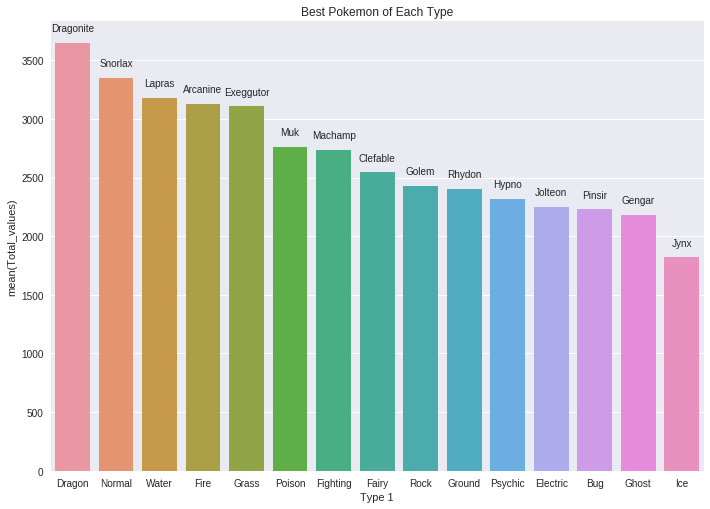

In [42]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x="Type 1", y="Total_values", data=df_poke_best)
i  = 0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            df_poke_best['Name'].values[i],
            ha="center")
    i = i+1
sns.plt.title('Best Pokemon of Each Type')

In [41]:
fig.savefig('ana_1_poke_best.png')